In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt

# Zadanie 5

## a)
W tym zadaniu należało sprawdzić jak wybór funkcji $m$ wpływa na uzyskiwane wyniki. Preztestowano, dla funkcji hashującej SHA256 dwa rodzaje funkcji $m$ - generującej zbió® z powtórzeniami oraz bez powtórzeń, odpowiednio dla $n = 1, \ldots, 10^4$ i $k = 400$.

In [3]:
data_5a = pd.read_csv('data/5a.csv')
data_5a['estimated/n'] = data_5a['estimated'] / data_5a['n']
data_5a

,unique_multiset,n,expected,estimated,estimated/n
0,False,1,1,1,1.000000
1,False,2,2,2,1.000000
2,False,3,3,3,1.000000
3,False,4,4,4,1.000000
4,False,5,5,5,1.000000
...,...,...,...,...,...
19995,True,9996,9996,9569,0.957283
19996,True,9997,9997,9613,0.961588
19997,True,9998,9998,9896,0.989798
19998,True,9999,9999,9978,0.997900


In [4]:
data_5a_non_unique = data_5a[0:10000]
data_5a_non_unique

,unique_multiset,n,expected,estimated,estimated/n
0,False,1,1,1,1.000000
1,False,2,2,2,1.000000
2,False,3,3,3,1.000000
3,False,4,4,4,1.000000
4,False,5,5,5,1.000000
...,...,...,...,...,...
9995,False,9996,9513,9100,0.910364
9996,False,9997,9492,9134,0.913674
9997,False,9998,9494,8920,0.892178
9998,False,9999,9537,9447,0.944794


In [5]:
data_5a_unique = data_5a[10000:20000]
data_5a_unique

,unique_multiset,n,expected,estimated,estimated/n
10000,True,1,1,1,1.000000
10001,True,2,2,2,1.000000
10002,True,3,3,3,1.000000
10003,True,4,4,4,1.000000
10004,True,5,5,5,1.000000
...,...,...,...,...,...
19995,True,9996,9996,9569,0.957283
19996,True,9997,9997,9613,0.961588
19997,True,9998,9998,9896,0.989798
19998,True,9999,9999,9978,0.997900


Text(0.5, 1.0, 'Unique values')

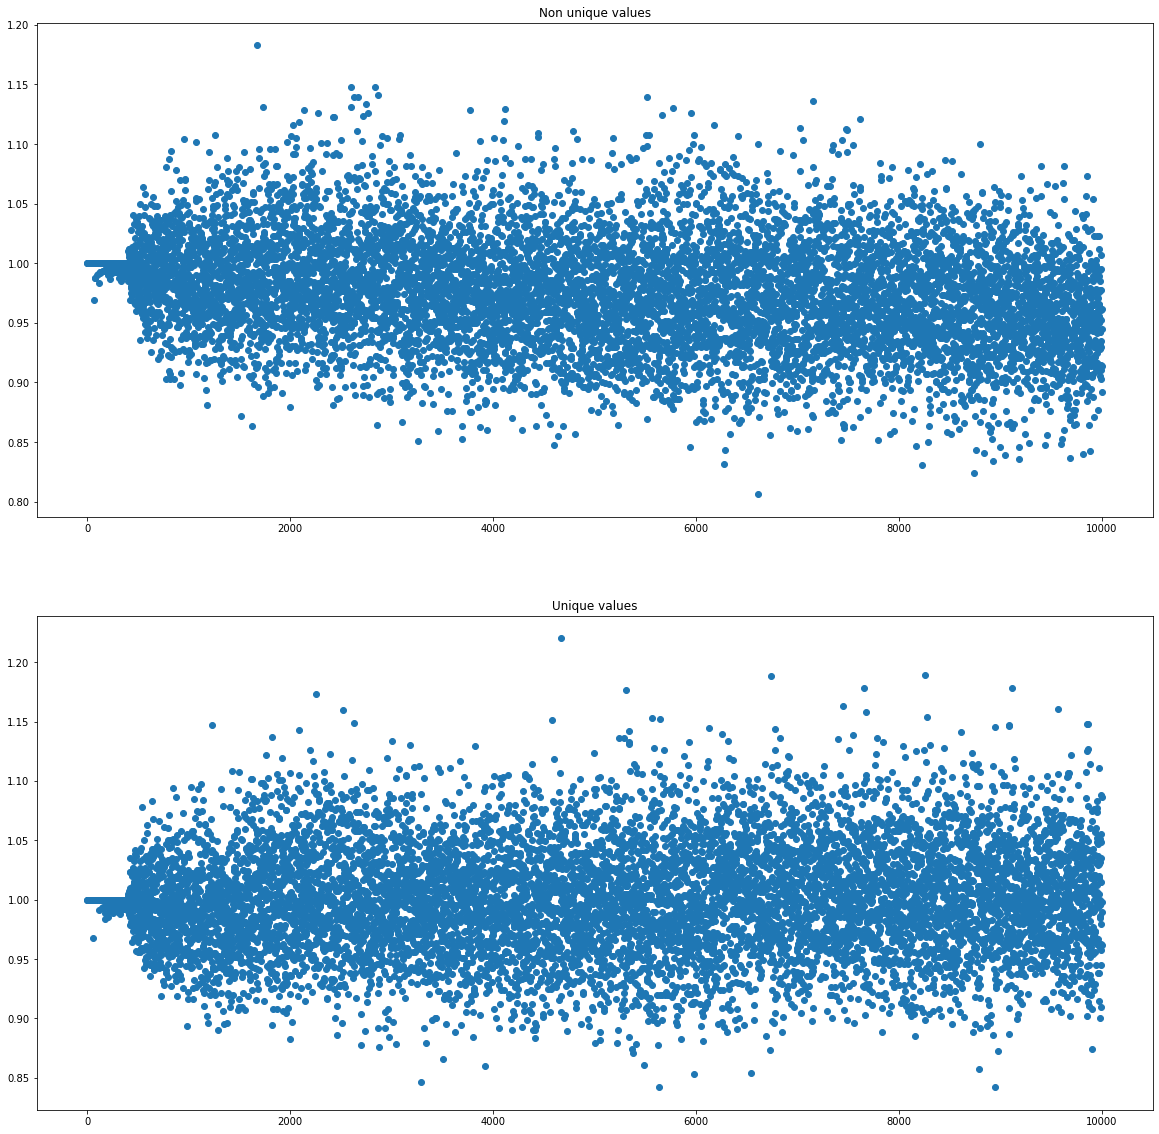

In [6]:
x = np.linspace(1, 10000, 10000)
fig, ax = plt.subplots(2, figsize=(20,20))
ax[0].scatter(x, data_5a_non_unique['estimated/n'])
ax[0].set_title("Non unique values")
ax[1].scatter(x, data_5a_unique['estimated/n'])
ax[1].set_title("Unique values")

## b)
W tej części zadania 5. należało dla $k \in \{1, 2, 3, 100, 400 \}$ i $n = 1, \dots, 10^4$ sprawdzić wyniki zwracane przez algorytm $\texttt{MinCount}$. Na podstawie otrzymanych wyników wyliczono stosunek $\frac{\hat{n}}{n}$.

In [7]:
data_5b = pd.read_csv('data/5b.csv')
data_5b['estimated/n'] = data_5b['estimated'] / data_5b['n']
data_5b

,k,n,expected,estimated,estimated/n
0,2,1,1,1,1.000000
1,2,2,2,1,0.500000
2,2,3,3,5,1.666667
3,2,4,4,2,0.500000
4,2,5,5,7,1.400000
...,...,...,...,...,...
49995,400,9996,9518,9585,0.958884
49996,400,9997,9499,9595,0.959788
49997,400,9998,9532,9539,0.954091
49998,400,9999,9525,8607,0.860786


Text(0.5, 1.0, 'k=400')

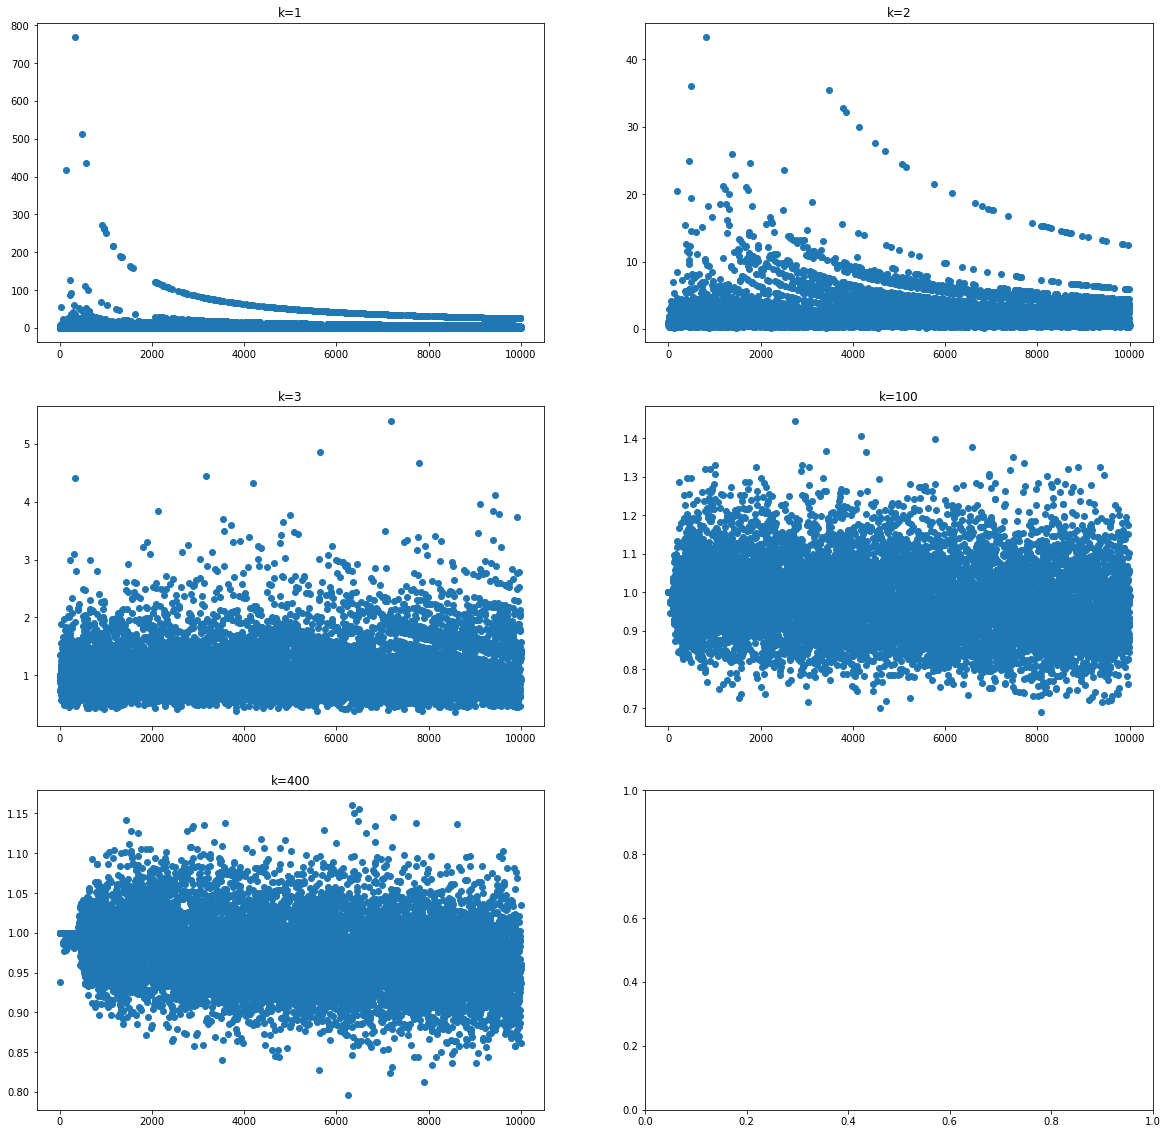

In [8]:
x = np.linspace(1, 10000, 10000)
fig, ax = plt.subplots(3, 2, figsize=(20,20))
ax[0, 0].scatter(x, data_5b['estimated/n'][0:10000])
ax[0, 0].set_title("k=1")
ax[0, 1].scatter(x, data_5b['estimated/n'][10000:20000])
ax[0, 1].set_title("k=2")
ax[1, 0].scatter(x, data_5b['estimated/n'][20000:30000])
ax[1, 0].set_title("k=3")
ax[1, 1].scatter(x, data_5b['estimated/n'][30000:40000])
ax[1, 1].set_title("k=100")
ax[2, 0].scatter(x, data_5b['estimated/n'][40000:50000])
ax[2, 0].set_title("k=400")

In [9]:
data_6 = pd.read_csv('data/6.csv')
data_6['diff'] = abs((data_6['expected'] - data_6['estimated']) / data_6['expected']) * 100
data_6

,hash,b,expected,estimated,diff
0,sha256,8,9493,254,97.324344
1,sha256,8,9513,254,97.329970
2,sha256,8,9511,254,97.329408
3,sha256,8,9518,254,97.331372
4,sha256,8,9529,254,97.334453
...,...,...,...,...,...
23995,sha1,256,9496,9029,4.917860
23996,sha1,256,9550,9436,1.193717
23997,sha1,256,9540,9373,1.750524
23998,sha1,256,9537,9918,3.994967


## c)

W tym zadaniu należało eksperymentalnie wyznaczyć wartość $k$, dla którego zachodzi zależność $|\frac{\hat{n}}{n} - 1| < 10$%

In [10]:
data_5c = pd.read_csv('data/5c.csv')
data_5c['ratio'] = abs((data_5c['estimated'] / data_5c['n']) - 1) < 0.1
data_5c

,k,n,expected,estimated,ratio
0,100,1,1,1,True
1,100,2,2,2,True
2,100,3,3,3,True
3,100,4,4,4,True
4,100,5,5,5,True
...,...,...,...,...,...
129995,330,9996,9493,8421,False
129996,330,9997,9505,8958,False
129997,330,9998,9524,9808,True
129998,330,9999,9508,8966,False


In [11]:
summary_5c = data_5c.groupby('k').agg([np.mean])
summary_5c

,n,expected,estimated,ratio
,mean,mean,mean,mean
k,,,,
100,5000.5,4837.8633,4869.3864,0.6852
120,5000.5,4837.8395,4854.5295,0.7359
150,5000.5,4837.9211,4850.4338,0.7877
170,5000.5,4837.6963,4844.0430,0.8136
200,5000.5,4838.1136,4837.1783,0.8428
220,5000.5,4837.8648,4834.9552,0.8539
250,5000.5,4837.7973,4828.0578,0.8756
270,5000.5,4837.8768,4832.7632,0.8950


# Zadanie 6

W tem zadaniu należało dla $k \in \{1, 2, 3, 100, 400 \}$ i $n = 1, \dots, 10^4$ sprawdzić wyniki zwracane przez algorytm $\texttt{MinCount}$. Próby przeprowadzony dla funkcji haszujących - MD5, SHA1, SHA256 oraz SHA512. Celem zadania było sprawdzenie jak długość hasha wpływa na jakość otrzymywanych wyników. Długości otrzymywanych hashy skracano do odpowiedniej liczby bitów $b \in \{8, 16, 32, 64, 128, 256 \}$

In [12]:
summary_6 = data_6.groupby(['hash', 'b']).agg([np.min, np.max, np.mean, np.var])
summary_6

expected                             estimated                   \
               amin  amax      mean         var      amin   amax      mean   
hash   b                                                                     
md5    8       9452  9584  9515.868  439.375952       254    254   254.000   
       16      9448  9579  9516.586  413.552156      7369   9378  8343.214   
       32      9449  9581  9515.583  448.331442      7767  10181  8889.473   
       64      9461  9585  9515.249  419.708708      7662  10188  8905.564   
       128     9453  9586  9516.246  449.200685      8041  10626  9161.227   
       256     9447  9583  9515.607  445.041593      7567  10601  9151.224   
sha1   8       9446  9574  9516.756  387.429894       254    254   254.000   
       16      9442  9584  9515.947  488.290481      7371   9246  8227.234   
       32      9445  9584  9517.398  446.958555      7728   9995  8755.279   
       64      9443  9578  9515.572  459.069886      7729   9857  8734.609   
       128     9445  9587  9516.188  448.677333      8183  11417  9567.853   
       256     9443  9569  9515.851  387.820620      8043  10940  9458.963   
sha256 8       9451  9589  9516.647  433.237629       254    254   254.000   
       16      9454  9594  9516.582  446.221497      7310   9585  8366.754   
       32      9446  9581  9517.566  393.513157      7878  10170  8942.111   
       64      9451  9590  9516.411  412.222301      7790  10135  8923.240   
       128     9450  9581  9516.079  432.347106      8052  11027  9516.115   
       256     9448  9574  9516.857  416.847398      8128  11227  9567.314   
sha512 8       9449  9581  9517.224  399.345169       254    254   254.000   
       16      9442  9592  9516.280  467.663263      7382   9681  8201.062   
       32      9451  9586  9515.303  421.408600      7793   9986  8718.595   
       64      9450  9575  9515.714  438.000204      7616   9859  8731.076   
       128     9451  9575  9515.637  445.336568      8025  10851  9492.623   
       256     9455  9581  9515.965  423.395170      8294  11382  9574.662   

                                diff                                   
                      var       amin       amax       mean        var  
hash   b                                                               
md5    8         0.000000  97.312738  97.349750  97.330761   0.000035  
       16   102917.986190   1.399853  22.472383  12.329893  11.303558  
       32   134435.967238   0.073437  18.610500   6.780880  12.140236  
       64   125437.129033   0.000000  19.313395   6.568961  11.719940  
       128  181608.600071   0.010537  15.384615   4.826047  10.690606  
       256  189056.394218   0.000000  20.598111   4.877588  11.715790  
sha1   8         0.000000  97.311031  97.346981  97.331012   0.000030  
       16    93651.200444   3.000420  22.678684  13.542822  10.272693  
       32   124631.250409   0.167557  19.053106   8.090995  12.353938  
       64   114466.252371   0.178403  18.719108   8.248637  11.894803  
       128  209195.444836   0.000000  20.039954   3.799978   8.909340  
       256  194735.677308   0.000000  15.452539   3.723253   8.045299  
sha256 8         0.000000  97.312454  97.351132  97.330980   0.000034  
       16   110780.528012   0.115401  23.375262  12.084430  12.145025  
       32   164399.892572   0.010464  17.421384   6.398415  13.720158  
       64   142043.519920   0.010502  17.982733   6.471139  12.636446  
       128  202006.704479   0.000000  15.696149   3.767456   8.046116  
       256  186223.138543   0.000000  18.403290   3.607200   7.739460  
sha512 8         0.000000  97.311885  97.348920  97.331143   0.000031  
       16   101122.170326   1.244510  22.563726  13.823453  11.011646  
       32   131631.402377   0.105530  17.998115   8.416819  13.803241  
       64   140973.840064   0.000000  19.840017   8.277194  14.929694  
       128  226139.538409   0.000000  15.570752   4.036761   8.561416  
       256  245811.613369   0.01

# Zadanie 7

W tym zadaniu należało porównać teoretyczne wyniki koncentracji estymatora $\hat{n}$ wykorzystaując nierówności **Czebyszewa** i **Chernoffa**. Dla $n = 1, \ldots, 10^4$ i $\alpha = 5$%, $1$%, $0.5$% przy założeniu, że:

$\mathrm{Pr}[1 - \delta < \frac{\hat{n}}{n} < 1 + \delta] > 1 - \alpha$

In [13]:
data_7 = pd.read_csv('data/5b.csv')[40000:50000]
data_7

,k,n,expected,estimated
40000,400,1,1,1
40001,400,2,2,2
40002,400,3,3,3
40003,400,4,4,4
40004,400,5,5,5
...,...,...,...,...
49995,400,9996,9518,9585
49996,400,9997,9499,9595
49997,400,9998,9532,9539
49998,400,9999,9525,8607


## Nierówność Czebyszewa

$\mathrm{Pr}[1 - \delta < \frac{\hat{n}}{n} < 1 + \delta] > 1 - \alpha$

Przekształcamy:

$n - n\delta < \hat{n} < n + n\delta$

$-n\delta < \hat{n} - n < n\delta$

Nierowność Czebyszewa ma postać $P(|X - E(X)| < a) > 1 - \frac{\mathrm{Var}(X)}{a^2}$, gdzie $a = n\delta$. Teraz niech $\alpha = \frac{\mathrm{Var}(X)}{a^2} = \frac{n^3\delta^2(n - k + 1)}{k - 2}$. Z tego otrzymujemy, że $\delta = \sqrt{\frac{n - k + 1}{n\alpha(k-2)}}$

# Nierówność Chernoffa 

Nierówność ta zadana jest wzorem: $P(|\frac{\hat{n}}{n} - 1| \geq \delta) \leq 2e^{-\frac{n\delta^2}{3}}$. Przyjmijmy $\alpha = 2e^{-\frac{n\delta^2}{3}}$. Wyliczając wartość $\delta$ otrzyujmey $\delta = \sqrt{\frac{3\log(\frac{\alpha}{2})}{n}}$

In [18]:
def compute_chebyschew_bounds(data, alpha):
    n = data['n']
    delta = np.sqrt((n - k + 1) / (n * alpha * (k - 2)))
    
    return (n - n * delta, n + n * delta)

In [19]:
def compute_chernoff_bounds(data, alpha):
    n = data['n']
    delta = np.sqrt(3 * np.log(2 / alpha) / n)
    
    return (n - n * delta, n + n * delta)

In [20]:
n = 10000
k = 400
alphas = [0.005, 0.01, 0.05]

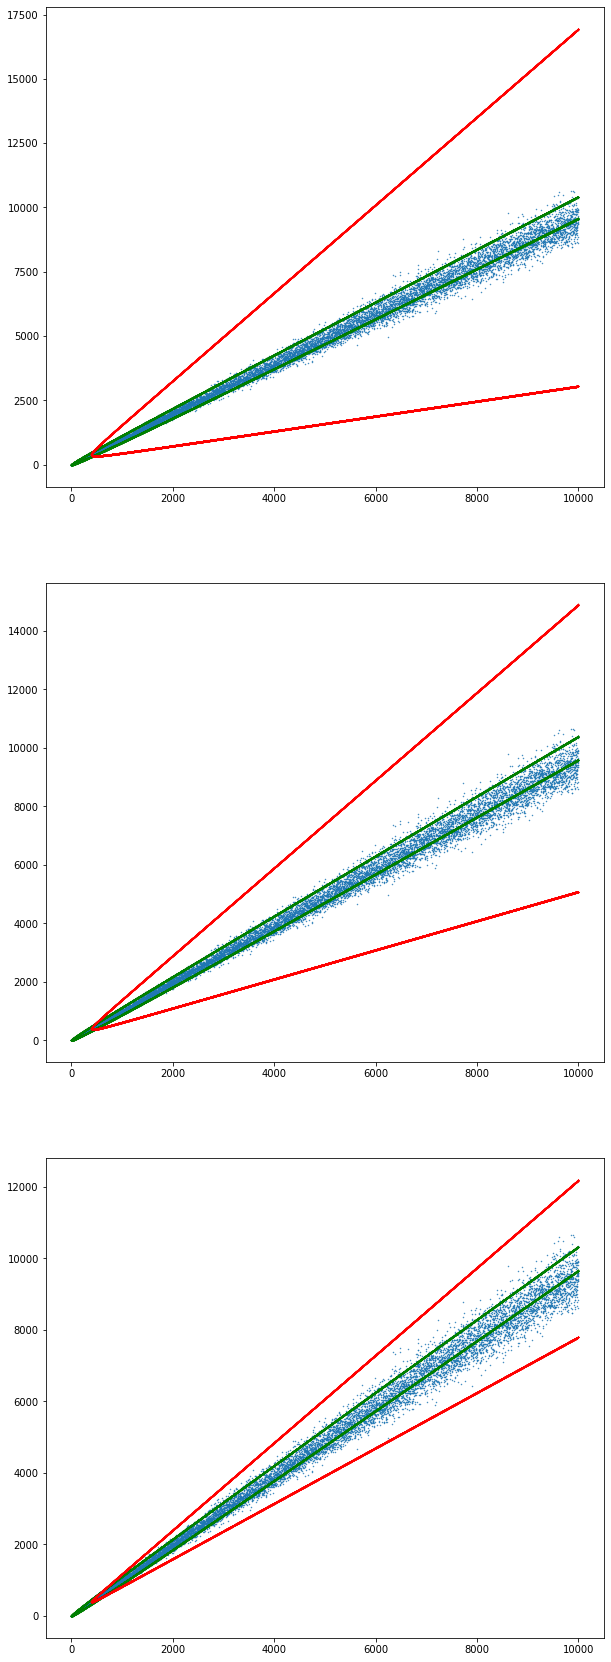

In [21]:
x = np.linspace(1, n, n)
fig, ax = plt.subplots(3, figsize=(10,30))

for i in range(len(alphas)):
    alpha = alphas[i]
    
    chebyschew_lower, chebyschew_upper = compute_chebyschew_bounds(data_7, alpha)
    chernoff_lower, chernoff_upper = compute_chernoff_bounds(data_7, alpha)
    
    size = 0.2
    
    ax[i].scatter(x, data_7['estimated'], s=size)
    ax[i].scatter(x, chernoff_lower, color='green', s=size)
    ax[i].scatter(x, chernoff_upper, color='green', s=size)
    ax[i].scatter(x, chebyschew_lower, color='red', s=size)
    ax[i].scatter(x, chebyschew_upper, color='red', s=size)